In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import jet, rainbow, jet_r, seismic
import scipy.io as sio
import re
import os
import sys
from typing import Any, Dict

sys.path.append("..")

import openep.io
import openep.case
import openep.mesh_routines

In [5]:
dat = openep.io.load_mat("../../../Downloads/new_dataset_2.mat")

for k,v in dat.items():
    print(k,v.dtype,v.shape)

userdata/cartoFolder uint64 (2,)
userdata/electric/annotations/mapAnnot float64 (1, 800)
userdata/electric/annotations/referenceAnnot float64 (1, 800)
userdata/electric/annotations/woi float64 (2, 800)
userdata/electric/barDirection float64 (3, 800)
userdata/electric/ecg float64 (2500, 800)
userdata/electric/egm float64 (2500, 800)
userdata/electric/egmRef float64 (2500, 800)
userdata/electric/egmSurfX float64 (3, 800)
userdata/electric/egmUni float64 (2, 2500, 800)
userdata/electric/egmUniX float64 (2, 3, 800)
userdata/electric/egmX float64 (3, 800)
userdata/electric/voltages/bipolar float64 (1, 800)
userdata/electric/voltages/unipolar float64 (1, 800)
userdata/rf/originaldata/ablparams/distaltemp float64 (1, 29762)
userdata/rf/originaldata/ablparams/impedance float64 (1, 29762)
userdata/rf/originaldata/ablparams/power float64 (1, 29762)
userdata/rf/originaldata/ablparams/time float64 (1, 29762)
userdata/rf/originaldata/force/axialangle float64 (1, 59083)
userdata/rf/originaldata/forc

In [13]:
case = openep.io.load_case("../../../Downloads/new_dataset_2.mat")
print(case)
print(tuple(case.rf))

new_dataset_2.mat( nodes: (14383, 3) indices: (16942, 3) fields: ('act', 'bip', 'uni', 'imp', 'frc') )
('originaldata/ablparams/distaltemp', 'originaldata/ablparams/impedance', 'originaldata/ablparams/power', 'originaldata/ablparams/time', 'originaldata/force/axialangle', 'originaldata/force/force', 'originaldata/force/lateralangle', 'originaldata/force/position', 'originaldata/force/time')


In [11]:
mesh=case.create_mesh()
openep.mesh_routines.compute_field(mesh,"bip",0,2,seismic)

mesh.show()

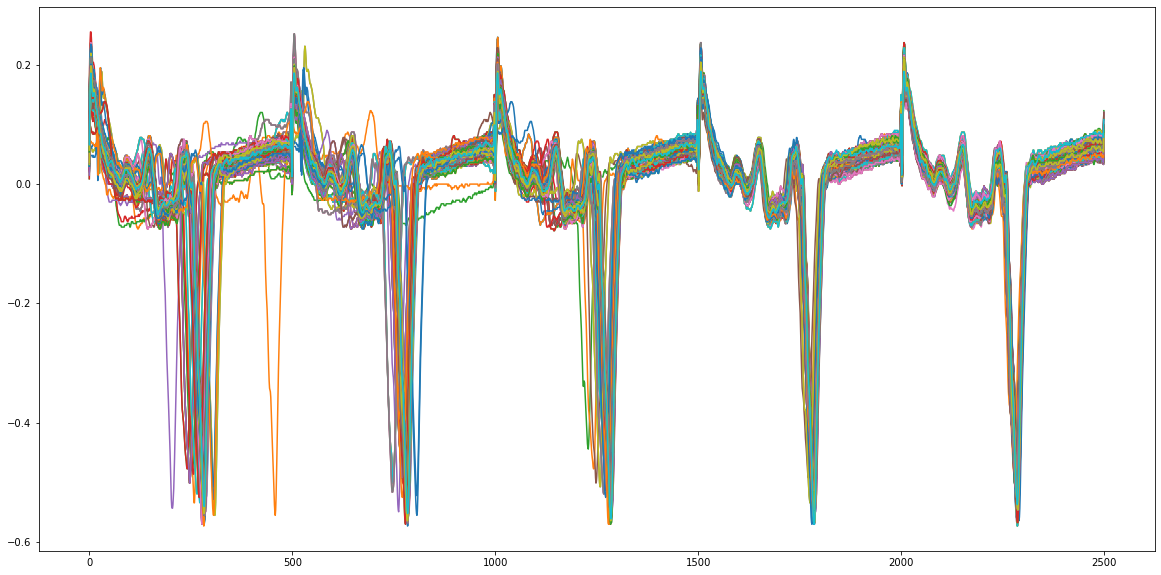

In [12]:
ecg=case.electric["ecg"]

plt.figure(figsize=(20,10))
_=plt.plot(ecg)